# 1. Data merging and unpacking

In [256]:
import numpy as np
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd


In [260]:
import os
print(os.getcwd())

C:\Users\saina\OneDrive\Desktop\PROJECT 3


In [261]:
# Reading all cities excel files 

df_hyderabad = pd.read_excel("Dataset/hyderabad_cars.xlsx")
df_hyderabad['Location'] = 'Hyderabad'

df_bangalore = pd.read_excel("Dataset/bangalore_cars.xlsx")
df_bangalore['Location'] = 'Bangalore'

df_chennai = pd.read_excel("Dataset/chennai_cars.xlsx")
df_chennai['Location'] = 'Chennai'

df_kolkata = pd.read_excel("Dataset/kolkata_cars.xlsx")
df_kolkata['Location'] = 'Kolkata'

df_delhi = pd.read_excel("Dataset/delhi_cars.xlsx")
df_delhi['Location'] = 'Delhi'

df_jaipur = pd.read_excel("Dataset/jaipur_cars.xlsx")
df_jaipur['Location'] = 'Jaipur'

In [12]:
# first we merge all cities dfs into one df 

merged_df = pd.concat([df_hyderabad, df_bangalore, df_chennai, df_kolkata, df_delhi, df_jaipur], axis=0).reset_index(drop=True)
merged_df.head(1)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Location
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,hyderabad


In [13]:
# dropped the car_links column as there is no required data in this column

merged_df = merged_df.drop(['car_links'],axis=1)

In [14]:
# ast.literal_eval safely evaluates a string containing Python literals (like numbers, lists, dicts) and converts them into their corresponding data types.
# so here we are converting string format data into dict 

merged_df['new_car_detail'] = merged_df['new_car_detail'].apply(ast.literal_eval)
merged_df['new_car_overview'] = merged_df['new_car_overview'].apply(ast.literal_eval)
merged_df['new_car_feature'] = merged_df['new_car_feature'].apply(ast.literal_eval)
merged_df['new_car_specs'] = merged_df['new_car_specs'].apply(ast.literal_eval)

In [15]:
# pd.json_normalize flattens nested JSON-like data into a flat table (DataFrame), expanding nested structures into columns.

details_unpacked = pd.json_normalize(merged_df['new_car_detail'])
details_unpacked.head(1)

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc
0,0,Petrol,Hatchback,"20,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Polo,2022,7746,1.0 TSI Highline Plus AT,₹ 10.44 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days


In [16]:
merged_df['new_car_overview'][0]

# this is the kind of data inside new_car_overview column and we want to extract data from the key 'top' and all nested keys inside it

{'heading': 'Car overview',
 'top': [{'key': 'Registration Year',
   'value': '2022',
   'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'},
  {'key': 'Insurance Validity',
   'value': 'Third Party insurance',
   'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'},
  {'key': 'Fuel Type',
   'value': 'Petrol',
   'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'},
  {'key': 'Seats',
   'value': '5 Seats',
   'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'},
  {'key': 'Kms Driven',
   'value': '20,000 Kms',
   'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'},
  {'key': 'RTO',
   'value': 'TS04',
   'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/rto.svg'},
  {'key': 'Ownership',
   'value': 'First Owner',
   'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'},
  {'key': 'Engine Displacement',
   'value': '999 cc',
   'icon': 'https://images10.gaadi.com/listing/v

In [17]:
# Unpacking the column new_car_overview data which is inside 'top'

def process_row(row):
    row_data = {item['key']: item['value'] for item in row['top']}
    return row_data

overview_unpacked = merged_df['new_car_overview'].apply(lambda row: pd.Series(process_row(row)))

overview_unpacked.head(1)

,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture
0,2022,Third Party insurance,Petrol,5 Seats,"20,000 Kms",TS04,First Owner,999 cc,Automatic,2022.0


In [18]:
merged_df['new_car_feature'][0]

# from this column we want to extract data frop 'top' and 'data' 

{'heading': 'Features',
 'top': [{'value': 'Power Steering'},
  {'value': 'Power Windows Front'},
  {'value': 'Air Conditioner'},
  {'value': 'Heater'},
  {'value': 'Adjustable Head Lights'},
  {'value': 'Fog Lights Front'},
  {'value': 'Anti Lock Braking System'},
  {'value': 'Centeral Locking'},
  {'value': 'Radio'}],
 'data': [{'heading': 'Comfort & Convenience',
   'subHeading': 'Comfort',
   'list': [{'value': 'Power Steering'},
    {'value': 'Power Windows Front'},
    {'value': 'Power Windows Rear'},
    {'value': 'Remote Trunk Opener'},
    {'value': 'Low Fuel Warning Light'},
    {'value': 'Accessory Power Outlet'},
    {'value': 'Vanity Mirror'},
    {'value': 'Rear Seat Headrest'},
    {'value': 'Cup Holders Front'},
    {'value': 'Seat Lumbar Support'},
    {'value': 'Multifunction Steering Wheel'},
    {'value': 'Cruise Control'},
    {'value': 'Rear ACVents'},
    {'value': 'Glove Box Cooling'},
    {'value': 'Voice Control'},
    {'value': 'Gear Shift Indicator'},
    {'

In [19]:
# Unpacking the dictionary column new_car_features

def process_features(row):
    features = {}

    # Flatten 'top' values
    for item in row['top']:
        features[item['value']] = True
    
    # Flatten 'data' values
    for data_item in row.get('data', []):
        for sub_item in data_item.get('list', []):
            features[sub_item['value']] = True
    
    return features

features_unpacked = merged_df['new_car_feature'].apply(lambda row: pd.Series(process_features(row)))

features_unpacked.head(1)

,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Radio,Power Windows Rear,...,Roof Carrier,Blind Spot Monitor,Compass,Removable Convertible Top,Active Noise Cancellation,Heads Up Display,Cassette Player,Power Folding3rd Row Seat,Headlamp Washers,Smart Key Band
0,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
merged_df['new_car_specs'][0]
# we want to extract data from 'top', and 'list'

{'heading': 'Specifications',
 'top': [{'key': 'Mileage', 'value': '16.47 kmpl'},
  {'key': 'Engine', 'value': '999 CC'},
  {'key': 'Max Power', 'value': '108.62bhp'},
  {'key': 'Torque', 'value': '175nm'},
  {'key': 'Wheel Size', 'value': 'R16'},
  {'key': 'Seats', 'value': '5'}],
 'data': [{'heading': 'Engine and Transmission',
   'subHeading': 'Engine',
   'list': [{'key': 'Color', 'value': 'Others'},
    {'key': 'Engine Type', 'value': '1.0L TSI Petrol'},
    {'key': 'Displacement', 'value': '999'},
    {'key': 'Max Power', 'value': '108.62bhp@5000-5500rpm'},
    {'key': 'Max Torque', 'value': '175nm@1750-4000rpm'},
    {'key': 'No of Cylinder', 'value': 3},
    {'key': 'Values per Cylinder', 'value': 4},
    {'key': 'Value Configuration', 'value': 'DOHC'},
    {'key': 'Fuel Suppy System', 'value': 'TSI'},
    {'key': 'BoreX Stroke', 'value': '74.5x76.4 mm'},
    {'key': 'Compression Ratio', 'value': '10.5:1'},
    {'key': 'Turbo Charger', 'value': 'Yes'},
    {'key': 'Super Charge

In [21]:
# Unpacking the dictionary column new_car_specs

def process_specifications(row):
    specs = {}

    # Flatten 'top' values
    for item in row['top']:
        specs[item['key']] = item['value']
    
    # Flatten 'data' values
    for data_item in row.get('data', []):
        for sub_item in data_item.get('list', []):
            specs[sub_item['key']] = sub_item['value']
    
    return specs

specs_unpacked = merged_df['new_car_specs'].apply(lambda row: pd.Series(process_specifications(row)))

specs_unpacked.head(1)


,Mileage,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,...,Turning Radius,Front Brake Type,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Top Speed,Acceleration,Ground Clearance Unladen
0,16.47 kmpl,999 CC,108.62bhp@5000-5500rpm,175nm,R16,5,Others,1.0L TSI Petrol,999,175nm@1750-4000rpm,...,4.9,Disc,Drum,"Tubeless,Radial",R16,5,280,NaN,NaN,NaN


In [22]:
# Now we combine all the unpacked dfs 

combined_unpacked_df = pd.concat([details_unpacked,overview_unpacked,features_unpacked,specs_unpacked,merged_df['Location']],axis=1)


In [23]:
# saving it into excel file
combined_unpacked_df.to_excel('combined_unpacked_df_full.xlsx',index=False)

# 2. Data Preprocessing

In [160]:
df = pd.read_excel('combined_unpacked_df_full.xlsx')

In [161]:
df.head(1)

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Front Brake Type,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Top Speed,Acceleration,Ground Clearance Unladen,Location
0,0,Petrol,Hatchback,"20,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Polo,2022,...,Disc,Drum,"Tubeless,Radial",R16,5.0,280,NaN,NaN,NaN,hyderabad


In [162]:
# Remove columns where more than 50% of the data is missing.

threshold = len(df) * 0.5
df.dropna(axis=1, thresh=threshold,inplace=True)

print(df.nunique())
# Discard columns that contain only a single unique value.
df = df.loc[:, df.nunique() > 1]

# Checking for duplicate rows and drop those rows 
print(df.duplicated().sum())
df.drop_duplicates(keep='first',inplace=True)   
print(df.duplicated().sum())

it                    1
ft                    5
bt                   10
km                 4090
transmission          2
                   ... 
No Door Numbers       5
Cargo Volumn        321
Top Speed           305
Acceleration        332
Location              6
Length: 122, dtype: int64
85
0


In [163]:
# Remove columns that are either duplicates, contain the same data, or are unnecessary, even if they have different names.
df.drop(['owner','centralVariantId','Fuel Type','Registration Year','Year of Manufacture','Engine Displacement','Transmission','Max Power','Torque','Wheel Size','Seats.1','Engine','Torque','Length','Width','Height','Wheel Base','Front Tread','Rear Tread','Kerb Weight','Values per Cylinder','Value Configuration','Seats','Turning Radius','Top Speed','Acceleration','Alloy Wheel Size','Kms Driven','Ownership','Max Torque','Cargo Volumn'],axis=1,inplace=True)

print(df.columns.tolist())
df.head(1)

['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName', 'price', 'Insurance Validity', 'RTO', 'Mileage', 'Color', 'Engine Type', 'Displacement', 'No of Cylinder', 'Fuel Suppy System', 'Turbo Charger', 'Super Charger', 'Gear Box', 'Drive Type', 'Seating Capacity', 'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type', 'No Door Numbers', 'Location']


,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Super Charger,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,Location
0,Petrol,Hatchback,"20,000",Automatic,1,Volkswagen,Volkswagen Polo,2022,1.0 TSI Highline Plus AT,₹ 10.44 Lakh,...,No,6 Speed,FWD,5.0,Electronic,Disc,Drum,"Tubeless,Radial",5.0,hyderabad


### Handling string columns that are numerical

In [164]:
df.dtypes

ft                     object
bt                     object
km                     object
transmission           object
ownerNo                 int64
oem                    object
model                  object
modelYear               int64
variantName            object
price                  object
Insurance Validity     object
RTO                    object
Mileage                object
Color                  object
Engine Type            object
Displacement          float64
No of Cylinder        float64
Fuel Suppy System      object
Turbo Charger          object
Super Charger          object
Gear Box               object
Drive Type             object
Seating Capacity      float64
Steering Type          object
Front Brake Type       object
Rear Brake Type        object
Tyre Type              object
No Door Numbers       float64
Location               object
dtype: object

### price 

In [165]:
# function to convert price from string to numerical
def convert_price(price_str):
    # Remove the currency symbol and commas
    price_str = re.sub(r'[₹,]', '', price_str).strip()
    
    # Handle different units
    if 'Crore' in price_str:
        price_str = price_str.replace('Crore', '').strip()
        return float(price_str) * 10000000  # Convert to the base unit (e.g., rupees)
    elif 'Lakh' in price_str:
        price_str = price_str.replace('Lakh', '').strip()
        return float(price_str) * 100000  # Convert to the base unit (e.g., rupees)
    elif 'Thousand' in price_str:
        price_str = price_str.replace('Thousand', '').strip()
        return float(price_str) * 1000  # Convert to the base unit (e.g., rupees)
    else:
        return float(price_str)  # Assume it's already in the base unit (e.g., rupees)

# Apply the conversion function to the 'price' column
df['price'] = df['price'].apply(convert_price)


### km


In [166]:
print(df['km'].isna().sum())

def convert_km(km_str):
    # Remove commas
    km_str = re.sub(r',', '', km_str).strip()
    # Convert to float
    return float(km_str)

# Apply the conversion function to the 'km' column
df['km'] = df['km'].apply(convert_km)
df.head(1)

0


,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Super Charger,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,Location
0,Petrol,Hatchback,20000.0,Automatic,1,Volkswagen,Volkswagen Polo,2022,1.0 TSI Highline Plus AT,1044000.0,...,No,6 Speed,FWD,5.0,Electronic,Disc,Drum,"Tubeless,Radial",5.0,hyderabad


### Mileage


In [167]:

def clean_mileage(value):
    if pd.isna(value):
        return np.nan

    value = str(value).strip().lower()

    if 'km/kg' in value:
        numeric_value = re.sub(r'[^\d.]', '', value)
        numeric_value = numeric_value.rstrip('.')
        value_float = float(numeric_value)*0.74
        return value_float

    else:
        numeric_value = re.sub(r'[^\d.]', '', value)
        numeric_value = numeric_value.rstrip('.')
        value_float = float(numeric_value)
        return value_float

df['Mileage'] = df['Mileage'].apply(clean_mileage)
df.head(1)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Super Charger,Gear Box,Drive Type,Seating Capacity,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,Location
0,Petrol,Hatchback,20000.0,Automatic,1,Volkswagen,Volkswagen Polo,2022,1.0 TSI Highline Plus AT,1044000.0,...,No,6 Speed,FWD,5.0,Electronic,Disc,Drum,"Tubeless,Radial",5.0,hyderabad


In [168]:
# filling null values in numerical columns with mean, median or mode 
df['Mileage'].fillna(df['Mileage'].mean().round(2), inplace=True)
df['Displacement'].fillna(df['Displacement'].median(), inplace=True)
df['No of Cylinder'].fillna(df['No of Cylinder'].median(), inplace=True)
df['Seating Capacity'].fillna(df['Seating Capacity'].mode()[0], inplace=True)
df['No Door Numbers'].fillna(df['Seating Capacity'].mode()[0], inplace=True)

C:\Users\saina\AppData\Local\Temp\ipykernel_3228\3946802794.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mileage'].fillna(df['Mileage'].mean().round(2), inplace=True)
C:\Users\saina\AppData\Local\Temp\ipykernel_3228\3946802794.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [169]:
df.shape

(8284, 29)

In [170]:
df.isna().sum()

ft                       0
bt                       4
km                       0
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
variantName              0
price                    0
Insurance Validity       4
RTO                    874
Mileage                  0
Color                    3
Engine Type            290
Displacement             0
No of Cylinder           0
Fuel Suppy System     1708
Turbo Charger         1029
Super Charger         1938
Gear Box               106
Drive Type            1540
Seating Capacity         0
Steering Type          254
Front Brake Type        96
Rear Brake Type         96
Tyre Type               77
No Door Numbers          0
Location                 0
dtype: int64

In [171]:
df.dtypes

ft                     object
bt                     object
km                    float64
transmission           object
ownerNo                 int64
oem                    object
model                  object
modelYear               int64
variantName            object
price                 float64
Insurance Validity     object
RTO                    object
Mileage               float64
Color                  object
Engine Type            object
Displacement          float64
No of Cylinder        float64
Fuel Suppy System      object
Turbo Charger          object
Super Charger          object
Gear Box               object
Drive Type             object
Seating Capacity      float64
Steering Type          object
Front Brake Type       object
Rear Brake Type        object
Tyre Type              object
No Door Numbers       float64
Location               object
dtype: object

In [172]:
# Remove outliers in the numerical columns using z-score
# Function to remove outliers using Z-score
def remove_outliers(df, columns, z_thresh=3):
        for column in columns:
        # Calculate Z-scores
            z_scores = stats.zscore(df[column])
        
        # Filter out the outliers
            df = df[(abs(z_scores) < z_thresh)]
    
        return df

# Apply the function to the DataFrame
columns_to_check = ['km','price','modelYear','Mileage','Displacement']
df_outliers_removed = remove_outliers(df, columns_to_check)
df_outliers_removed.shape

(7838, 29)

### correlation heatmap for numerical features

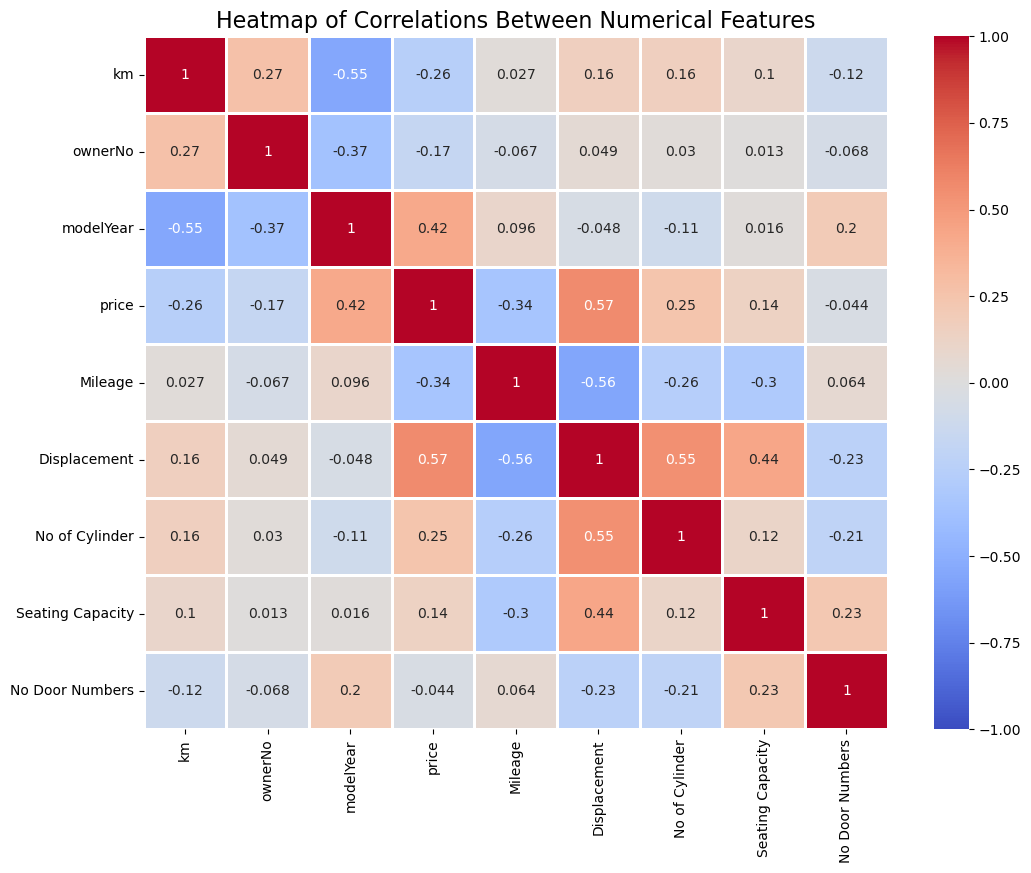

Correlation values with 'price':
km                 -0.256213
ownerNo            -0.169339
modelYear           0.421369
price               1.000000
Mileage            -0.343811
Displacement        0.565857
No of Cylinder      0.245100
Seating Capacity    0.137682
No Door Numbers    -0.043681
Name: price, dtype: float64


In [173]:
# Selecting only the numeric columns
numeric_cols_df = df_outliers_removed.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix for the numeric columns
corr_matrix = numeric_cols_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 9)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linecolor='white', linewidths=1)  
plt.title('Heatmap of Correlations Between Numerical Features', fontsize=16)
plt.show()

# Extracting correlations with 'price' column
price_corr = corr_matrix['price']

# Displaying the correlation values related to 'price'
print("Correlation values with 'price':")
print(price_corr)


C:\Users\saina\AppData\Local\Temp\ipykernel_3228\3990660344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_corr.index, y=price_corr.values, palette='RdYlBu')


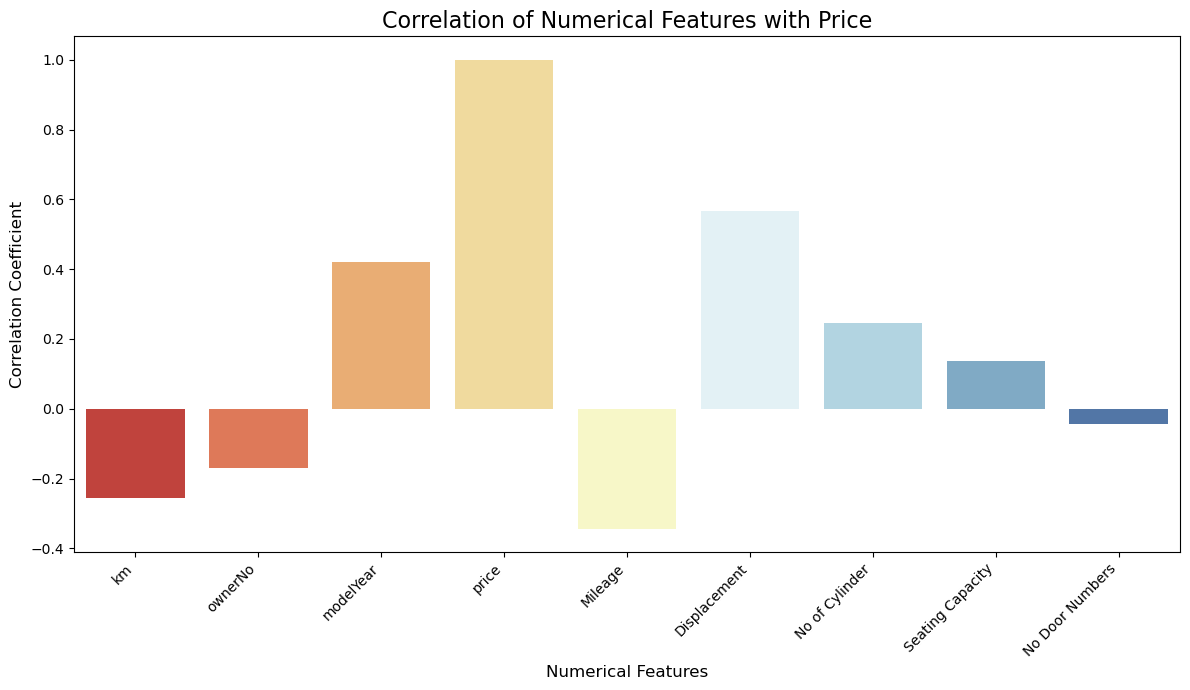

In [174]:
# Visualize the correlation of numerical columns with 'price' using a bar plot
plt.figure(figsize=(12, 7)) 
sns.barplot(x=price_corr.index, y=price_corr.values, palette='RdYlBu') 
plt.title('Correlation of Numerical Features with Price', fontsize=16)
plt.xlabel('Numerical Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

In [175]:
#The features modelYear, engine displacement, and km show a strong correlation with price. 
# while Seating Capacity, No Door Numbers, and No of Cylinder can be removed as they have little impact on the price.
# so we drop these columns
df_outliers_removed.drop(['Seating Capacity','No Door Numbers','No of Cylinder'],axis=1,inplace=True)

In [176]:
df_outliers_removed.head(1)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,Location
0,Petrol,Hatchback,20000.0,Automatic,1,Volkswagen,Volkswagen Polo,2022,1.0 TSI Highline Plus AT,1044000.0,...,TSI,Yes,No,6 Speed,FWD,Electronic,Disc,Drum,"Tubeless,Radial",hyderabad


## Handling Categorical data

In [177]:
df_outliers_removed

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,...,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,Location
0,Petrol,Hatchback,20000.0,Automatic,1,Volkswagen,Volkswagen Polo,2022,1.0 TSI Highline Plus AT,1044000.0,...,TSI,Yes,No,6 Speed,FWD,Electronic,Disc,Drum,"Tubeless,Radial",hyderabad
1,Petrol,Hatchback,85582.0,Manual,2,Hyundai,Hyundai EON,2014,Era Plus,260000.0,...,MPFI,No,No,5 Speed,FWD,Power,Disc,Drum,Tubeless,hyderabad
2,Petrol,SUV,10000.0,Manual,1,Hyundai,Hyundai Venue,2023,S BSVI,955000.0,...,NaN,No,NaN,5-Speed,NaN,Power,Disc,Drum,"Tubeless, Radial",hyderabad
3,Petrol,Hatchback,50750.0,Manual,1,Maruti,Maruti Baleno,2017,1.2 Alpha,671000.0,...,MPFI,No,No,5 Speed,FWD,Power,Disc,Drum,"Tubeless,Radial",hyderabad
4,Petrol,SUV,10000.0,Automatic,1,Mahindra,Mahindra Thar,2022,LX 4-Str Hard Top AT BSVI,1900000.0,...,NaN,Yes,NaN,6 Speed,4X4,Power,Disc,Drum,"Radial, Tubeless",hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,120000.0,Manual,1,Chevrolet,Chevrolet Beat,2011,LT,108000.0,...,MPFI,No,No,5 Speed,FWD,Power,Disc,Drum,"Tubeless,Radial",Jaipur
8365,Petrol,Hatchback,70000.0,Manual,1,Maruti,Maruti Alto,2007,STD,105000.0,...,MPFI,No,No,5 Speed,2WD,Manual,Disc,Drum,"Tubeless,Radial",Jaipur
8366,Petrol,SUV,20000.0,Manual,1,Renault,Renault Kiger,2022,RXZ,850000.0,...,MPFi,NaN,NaN,5 Speed,NaN,Electric,Disc,Drum,"Tubeless, Radial",Jaipur
8367,Petrol,Hatchback,40000.0,Manual,1,Maruti,Maruti Alto,2009,Std,100000.0,...,MPFI,No,No,5 Speed,2WD,Manual,Disc,Drum,"Tubeless,Radial",Jaipur


### ft - Fuel type


In [178]:
df_outliers_removed['ft'].value_counts()

ft
Petrol    5360
Diesel    2394
Cng         68
Lpg         16
Name: count, dtype: int64

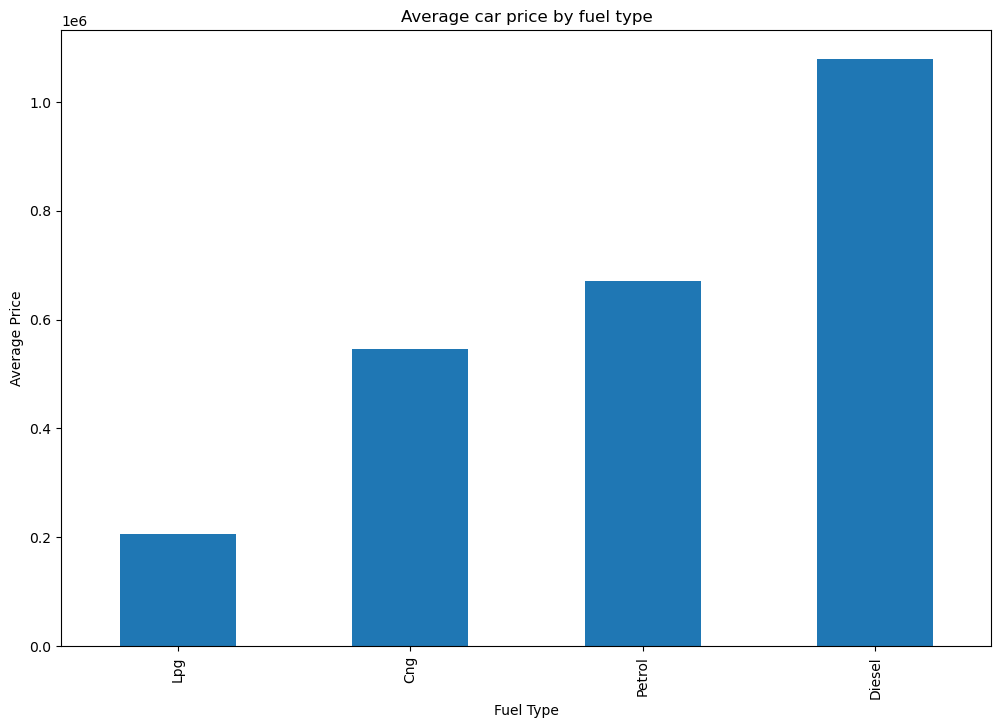

In [179]:
plt.figure(figsize=(12, 8))
average_prices = df_outliers_removed.groupby('ft')['price'].mean().sort_values()
average_prices.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average car price by fuel type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

In [180]:
# we need to keep this column because it shows price difference clearly

### bt - body type


In [181]:
df_outliers_removed['bt'].value_counts()

bt
Hatchback        3478
Sedan            2039
SUV              1958
MUV               331
Minivans           19
Pickup Trucks       5
Coupe               2
Convertibles        2
Wagon               1
Name: count, dtype: int64

In [182]:
# we can either combine the last 4 categories into one 'others' category or just drop those rows 
df_outliers_removed['bt']= df_outliers_removed['bt'].replace('Pickup Trucks','Other')
df_outliers_removed['bt']= df_outliers_removed['bt'].replace('Coupe','Other')
df_outliers_removed['bt']= df_outliers_removed['bt'].replace('Convertibles','Other')
df_outliers_removed['bt']= df_outliers_removed['bt'].replace('Wagon','Other')
# here we combined the Pickup Trucks, Coupe, Convertibles, Wagon categories into 'Other'

print(df_outliers_removed['bt'].value_counts())

bt
Hatchback    3478
Sedan        2039
SUV          1958
MUV           331
Minivans       19
Other          10
Name: count, dtype: int64


In [183]:
print(df_outliers_removed['bt'].isna().sum())
df_outliers_removed = df_outliers_removed.dropna(subset='bt')
print(df_outliers_removed['bt'].isna().sum())

3
0


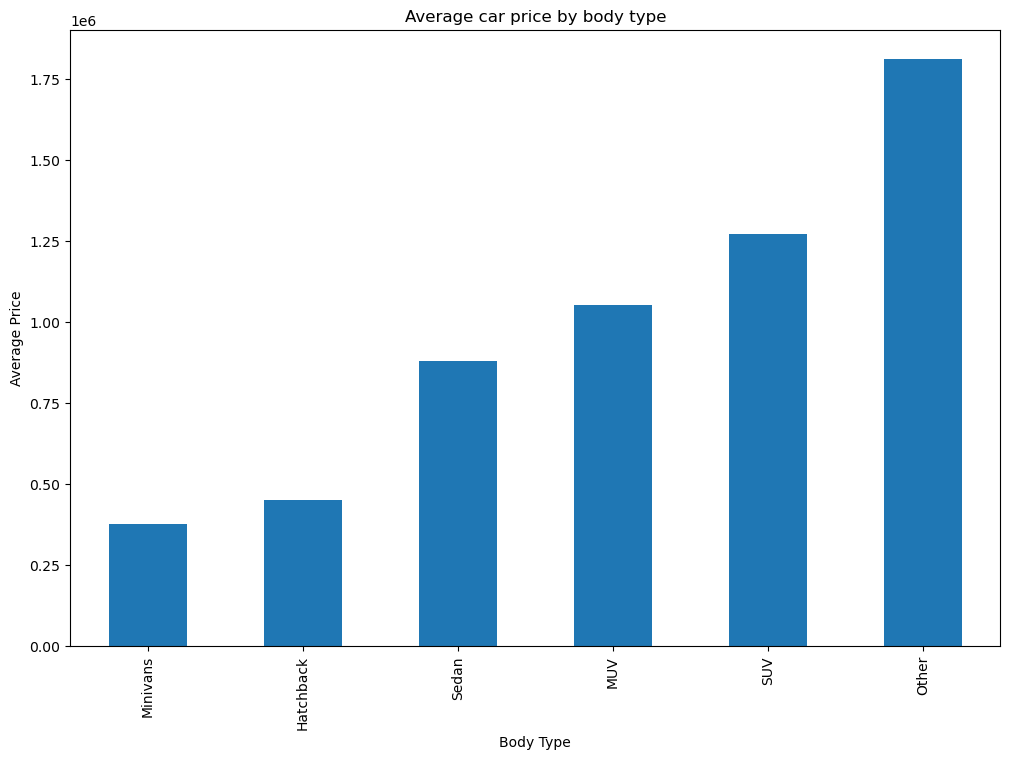

In [184]:
plt.figure(figsize=(12, 8))
average_prices = df_outliers_removed.groupby('bt')['price'].mean().sort_values()
average_prices.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average car price by body type')
plt.xlabel('Body Type')
plt.ylabel('Average Price')
plt.show()

In [185]:
# we need to keep this column because it shows price difference clearly

### transmission

In [186]:
df_outliers_removed['transmission'].value_counts()

transmission
Manual       5856
Automatic    1979
Name: count, dtype: int64

In [187]:
# we know this is very important , so we keep this 

### oem

In [188]:
df_outliers_removed['oem'].value_counts() <= 5

oem
Maruti                False
Hyundai               False
Honda                 False
Tata                  False
Mahindra              False
Renault               False
Volkswagen            False
Ford                  False
Toyota                False
Skoda                 False
Kia                   False
Mercedes-Benz         False
Audi                  False
BMW                   False
Jeep                  False
MG                    False
Nissan                False
Chevrolet             False
Datsun                False
Volvo                 False
Fiat                  False
Jaguar                False
Land Rover            False
Mini                  False
Mitsubishi            False
Citroen               False
Mahindra Renault       True
Mahindra Ssangyong     True
Lexus                  True
Hindustan Motors       True
Isuzu                  True
Porsche                True
Name: count, dtype: bool

In [190]:
# We drop the rows with brands having less than 5 cars 

oem_counts = df_outliers_removed['oem'].value_counts()
df_outliers_removed = df_outliers_removed[df_outliers_removed['oem'].map(oem_counts) > 5]
print(df_outliers_removed['oem'].value_counts())

oem
Maruti           2169
Hyundai          1626
Honda             852
Tata              408
Mahindra          365
Renault           309
Volkswagen        286
Ford              283
Toyota            245
Skoda             158
Kia               155
Mercedes-Benz     151
Audi              129
BMW               122
Jeep              108
MG                 83
Nissan             78
Chevrolet          76
Datsun             74
Volvo              37
Fiat               30
Jaguar             25
Land Rover         22
Mini               11
Mitsubishi          9
Citroen             8
Name: count, dtype: int64


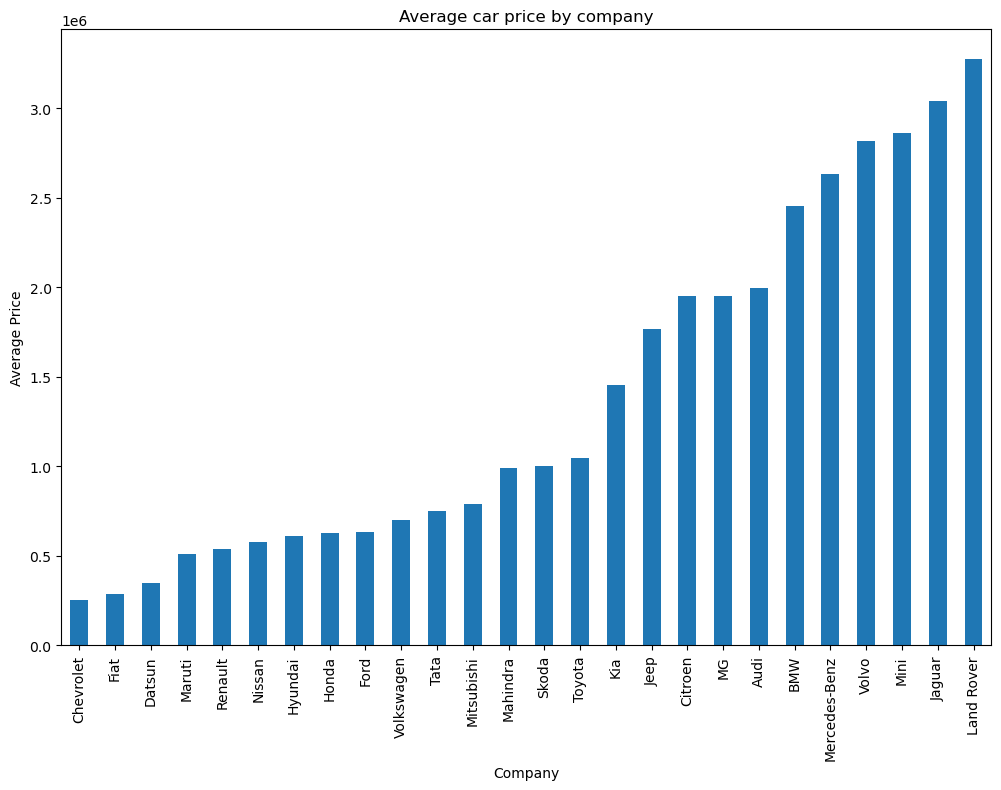

In [191]:
plt.figure(figsize=(12, 8))
average_prices = df_outliers_removed.groupby('oem')['price'].mean().sort_values()
average_prices.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average car price by company')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.show()

In [192]:
df_outliers_removed.rename(columns={'oem': 'company'}, inplace=True)


### model

In [158]:
print(df_outliers_removed['model'].value_counts() < 10)

model
Honda City              False
Maruti Swift            False
Hyundai i20             False
Maruti Baleno           False
Hyundai Grand i10       False
                        ...  
Mini 5 DOOR              True
Fiat Punto Pure          True
Volvo S 80               True
Tata Aria                True
Volkswagen CrossPolo     True
Name: count, Length: 254, dtype: bool


In [194]:
# checking models with less than 10 cars listed 
import pandas as pd

# Assuming df_outliers_removed is your DataFrame
value_counts = df_outliers_removed['model'].value_counts()

# Convert the result to a DataFrame
value_counts_df = value_counts.reset_index()

# Rename the columns for better readability
value_counts_df.columns = ['model', 'count']

filtered_value_counts_df = value_counts_df[value_counts_df['count'] < 10]
print(filtered_value_counts_df)

                    model  count
133             Volvo S60      9
134    Tata Safari Storme      9
135        Ford Freestyle      9
136           Skoda Laura      9
137        Chevrolet Sail      9
..                    ...    ...
249           Mini 5 DOOR      1
250       Fiat Punto Pure      1
251            Volvo S 80      1
252             Tata Aria      1
253  Volkswagen CrossPolo      1

[121 rows x 2 columns]


In [195]:
# we have 420 rows with the data of the models that have less than 10 cars 
filtered_value_counts_df['count'].sum()

420

In [196]:
# Define the threshold
threshold = 10

# Identify models to keep and filter
categories_to_keep_model = value_counts[value_counts >= threshold].index
df_outliers_removed = df_outliers_removed[df_outliers_removed['model'].isin(categories_to_keep_model)]

# Display the shape of the filtered DataFrame
print(df_outliers_removed.shape)

(7399, 26)


In [199]:
df_outliers_removed['model'].value_counts()

model
Honda City                       363
Maruti Swift                     348
Hyundai i20                      328
Maruti Baleno                    292
Hyundai Grand i10                259
                                ... 
Mahindra Marazzo                  10
Mahindra XUV700                   10
MG Gloster                        10
Toyota Camry                      10
Land Rover Range Rover Evoque     10
Name: count, Length: 133, dtype: int64

### variantName

In [197]:
# there are more than 250 models and many classes in Variant name,so we drop these.
df_outliers_removed.drop('variantName',axis=1,inplace=True)


### Insurance Validity

In [201]:
df_outliers_removed['Insurance Validity'].value_counts()

Insurance Validity
Third Party insurance    3536
Comprehensive            2753
Third Party               609
Zero Dep                  289
Not Available             204
1                           3
2                           1
Name: count, dtype: int64

In [202]:
# we have 4 null rows in this column so we drop them
print(df_outliers_removed['Insurance Validity'].isna().sum())
df_outliers_removed = df_outliers_removed.dropna(subset = ['Insurance Validity'])
print(df_outliers_removed['Insurance Validity'].isna().sum())


4
0


C:\Users\saina\AppData\Local\Temp\ipykernel_3228\1069776504.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_outliers_removed['Insurance Validity'].replace({'1': 'Not Available', '2': 'Not Available','Third Party':'Third Party insurance'}, inplace=True)


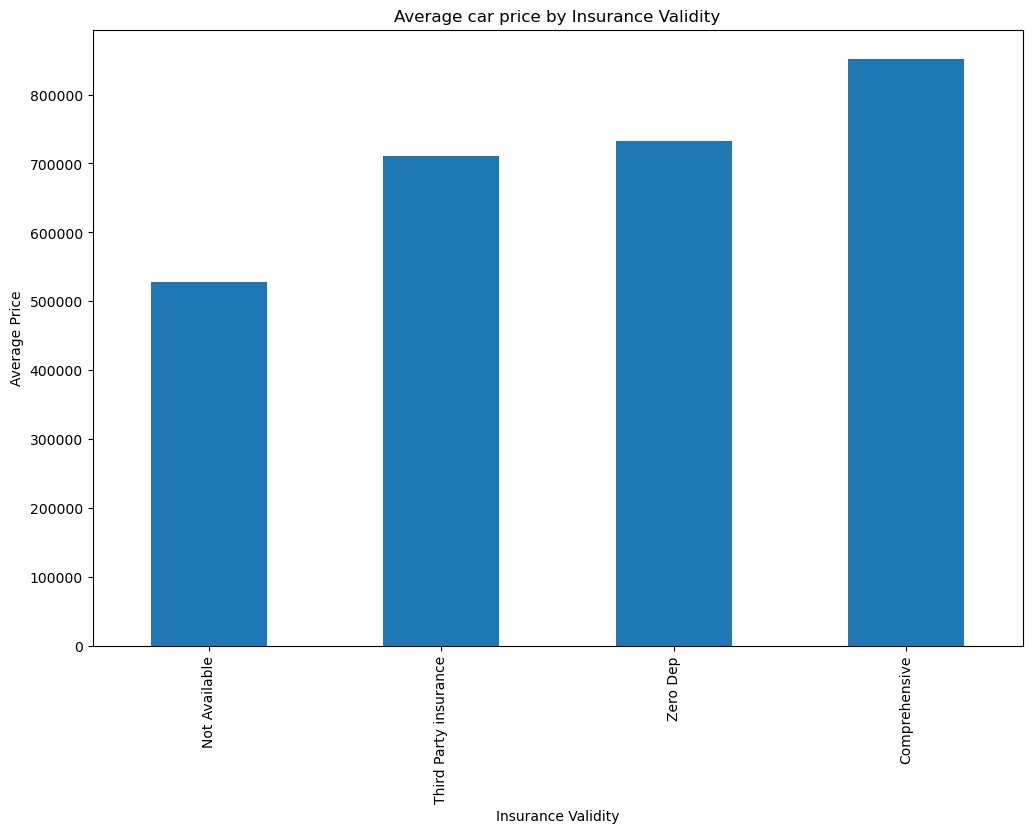

In [203]:
# convert rows with values  '1' and '2'  into 'Not Available'
df_outliers_removed['Insurance Validity'].replace({'1': 'Not Available', '2': 'Not Available','Third Party':'Third Party insurance'}, inplace=True)

#plotting bar graph wrt price
plt.figure(figsize=(12, 8))
average_prices = df_outliers_removed.groupby('Insurance Validity')['price'].mean().sort_values()
average_prices.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average car price by Insurance Validity')
plt.xlabel('Insurance Validity')
plt.ylabel('Average Price')
plt.show()

### RTO

In [204]:
print(df_outliers_removed['RTO'].value_counts())
print(df_outliers_removed['RTO'].isna().sum())

RTO
WB02    415
RJ14    322
TS07    260
TS08    229
KA03    211
       ... 
Wb12      1
Wb52      1
wb02      1
Wb34      1
UP82      1
Name: count, Length: 431, dtype: int64
764


In [205]:
# there are many null values in this column, so we cannot drop them or we will loose data. we assign 'unknown' to such columns 
# and we group the RTO location by state

In [206]:
# Mapping dictionary for RTO regions
rto_region_mapping = {
    'KA': 'Karnataka',
    'HR': 'Haryana',
    'WB': 'West Bengal',
    'TN': 'Tamil Nadu',
    'UP': 'Uttar Pradesh',
    'DL': 'Delhi',
    'MH': 'Maharashtra',
    'RJ': 'Rajasthan',
    'AP': 'Andhra Pradesh',
    'GJ': 'Gujarat',
    'OR': 'Odisha',
    'PY': 'Puducherry',
    'Unknown': 'Unknown'
}

# Function to map RTO codes to states
def rto_to_region(rto_value):
    if pd.isna(rto_value):
        return 'Unknown'
    rto_value_str = str(rto_value)  # Ensure value is string
    for prefix in rto_region_mapping:
        if rto_value_str.startswith(prefix):
            return rto_region_mapping[prefix]
    return 'Unknown'

# Handle missing RTO values by setting them to 'Unknown'
df_outliers_removed['RTO'] = df_outliers_removed['RTO'].fillna('Unknown')

# Apply the RTO mapping function and create a new column for regions
df_outliers_removed['RTO_region'] = df_outliers_removed['RTO'].apply(rto_to_region)

# Drop the original 'RTO' column
df_outliers_removed.drop('RTO', axis=1, inplace=True)

# Display the modified DataFrame
df_outliers_removed.head(1)
print(df_outliers_removed['RTO_region'].isna().sum())

0


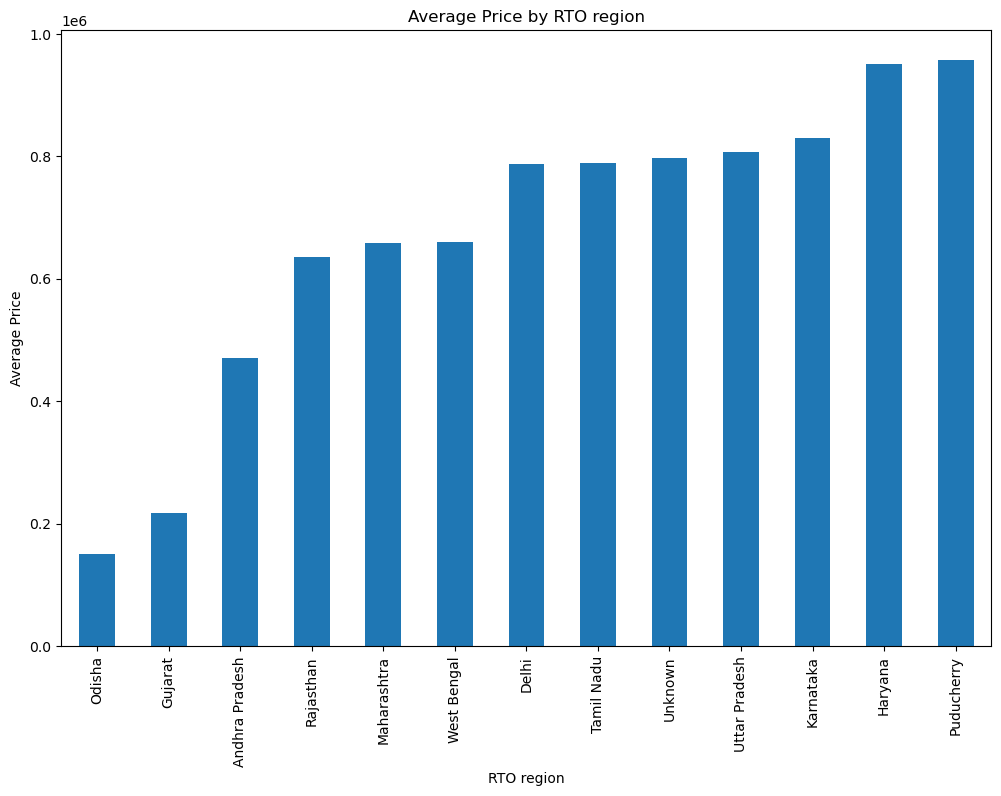

In [207]:
# plotting
plt.figure(figsize=(12, 8))
average_prices = df_outliers_removed.groupby('RTO_region')['price'].mean().sort_values()
average_prices.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average Price by RTO region')
plt.xlabel('RTO region')
plt.ylabel('Average Price')
plt.show()


In [208]:
# we keep this column because of the mean price difference in each state

### Color

In [209]:
print(df_outliers_removed['Color'].value_counts())
print(df_outliers_removed['Color'].isna().sum())

Color
Others                   1939
White                    1395
Silver                   1170
Red                       751
Blue                      537
                         ... 
Other                       1
O Purple                    1
Arctic Silver               1
Modern Steel Metallic       1
Light Orange                1
Name: count, Length: 143, dtype: int64
0


In [210]:
def determine_color(color):
    color_lower = color.lower()
    
    if 'white' in color_lower:
        return 'White'
    elif 'red' in color_lower or 'wine' in color_lower or 'cherry' in color_lower:
        return 'Red'
    elif 'blue' in color_lower:
        return 'Blue'
    elif 'brown' in color_lower:
        return 'Brown'
    elif 'gold' in color_lower:
        return 'Gold'
    elif 'green' in color_lower:
        return 'Green'
    elif 'black' in color_lower:
        return 'Black'     
    elif 'orange' in color_lower:
        return 'Orange'
    elif 'yellow' in color_lower:
        return 'Yellow'
    elif 'bronze' in color_lower:
        return 'Bronze'
    elif 'purple' in color_lower:
        return 'Purple'
    elif 'grey' in color_lower or 'gray' in color_lower:
        return 'Gray'
    elif 'silver' in color_lower or 'metal' in color_lower or 'steel' in color_lower:
        return 'Silver'
    else:
        return 'Other'  # Returns Other if no condition is met

# Apply the function to the DataFrame column
df_outliers_removed['Color'] = df_outliers_removed['Color'].apply(determine_color)
df_outliers_removed['Color'].value_counts()

Color
Other     2034
White     1442
Silver    1207
Red        771
Gray       578
Blue       549
Black      339
Brown      258
Orange      99
Gold        56
Green       33
Yellow      16
Purple       8
Bronze       5
Name: count, dtype: int64

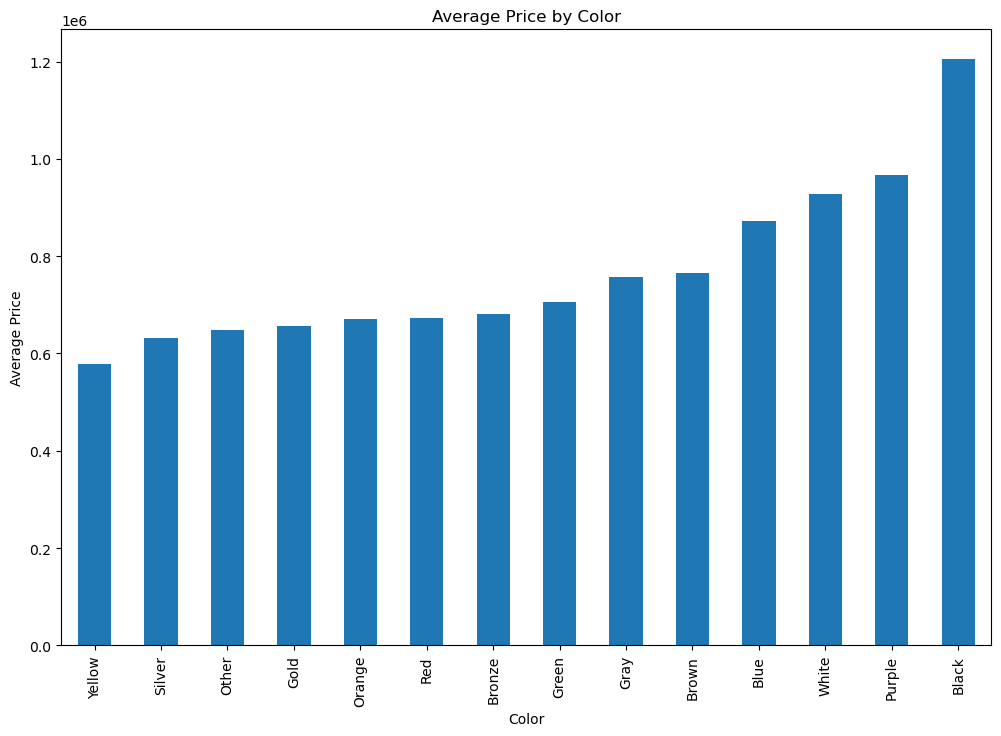

In [211]:
#plotting
plt.figure(figsize=(12, 8))
average_prices = df_outliers_removed.groupby('Color')['price'].mean().sort_values()
average_prices.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.show()


### Engine Type

In [212]:
df_outliers_removed['Engine Type'].value_counts()	

Engine Type
Kappa VTVT Petrol Engine      424
In-Line Engine                381
Petrol Engine                 295
i-VTEC Petrol Engine          259
i VTEC Engine                 199
                             ... 
1.5L Revotorq Turbocharged      1
All Aluminium light weigh       1
SD4 Diesel  Engine              1
2 cylinder, MPFI                1
16V DOHC VTT DICOR              1
Name: count, Length: 353, dtype: int64

In [213]:
# too many classes exist in this column , and we can use engine displacement and fuel type data instead of this column. so we drop it
df_outliers_removed.drop(['Engine Type'],axis=1,inplace=True)

### Fuel Suppy System

In [214]:
df_outliers_removed['Fuel Suppy System'].value_counts()	

Fuel Suppy System
MPFI                                  1959
MPFi                                   797
CRDi                                   748
CRDI                                   715
Direct Injection                       595
PGM-Fi                                 199
PGM - Fi                               155
GDi                                    111
Common Rail                             68
EFI                                     64
EFI(Electronic Fuel Injection)          61
TSI                                     56
MPI                                     47
MPi                                     38
PGM-FI (Programmed Fuel Injection)      37
SEFI                                    33
MPFI                                    33
EFI (Electronic Fuel Injection)         26
Direct Injection                        25
Electronic Injection System             15
PGM-FI                                  13
Multi-point injection                   11
TDCi                                

In [215]:
df_outliers_removed.drop(['Fuel Suppy System'],axis=1,inplace=True)

In [216]:
# too many classes exist in this column, so we drop it 
# we can use other columns like fuel type and transmission

### Turbo Charger and Super Charger

In [217]:
print(df_outliers_removed['Turbo Charger'].value_counts())
print(df_outliers_removed['Turbo Charger'].isna().sum())
print('\n',df_outliers_removed['Super Charger'].value_counts())
print(df_outliers_removed['Super Charger'].isna().sum())

Turbo Charger
No       3978
Yes      2440
Twin       21
NO         20
YES        15
no          8
Turbo       1
yes         1
Name: count, dtype: int64
911

 Super Charger
No     5695
Yes       6
NO        2
Name: count, dtype: int64
1692


In [218]:
# in super charger more than 90% values are No and there are many null values so we drop it and use Turbo charger column instead
df_outliers_removed.drop('Super Charger',axis=1,inplace=True)

In [219]:
# we convert values into boolean values 
# we are filling False if the value is missing(null)
mapping = {
    'No':False,
    'NO':False,
    'no':False,
    None:False,

    'Yes':True,
    'YES':True,
    'yes':True,
    'Turbo':True,
    'Twin':True,
}
df_outliers_removed['Turbo Charger'] = df_outliers_removed['Turbo Charger'].map(mapping).fillna(False)

print(df_outliers_removed['Turbo Charger'].value_counts())
print(df_outliers_removed['Turbo Charger'].isna().sum())




Turbo Charger
False    4917
True     2478
Name: count, dtype: int64
0


C:\Users\saina\AppData\Local\Temp\ipykernel_3228\487717842.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_outliers_removed['Turbo Charger'] = df_outliers_removed['Turbo Charger'].map(mapping).fillna(False)


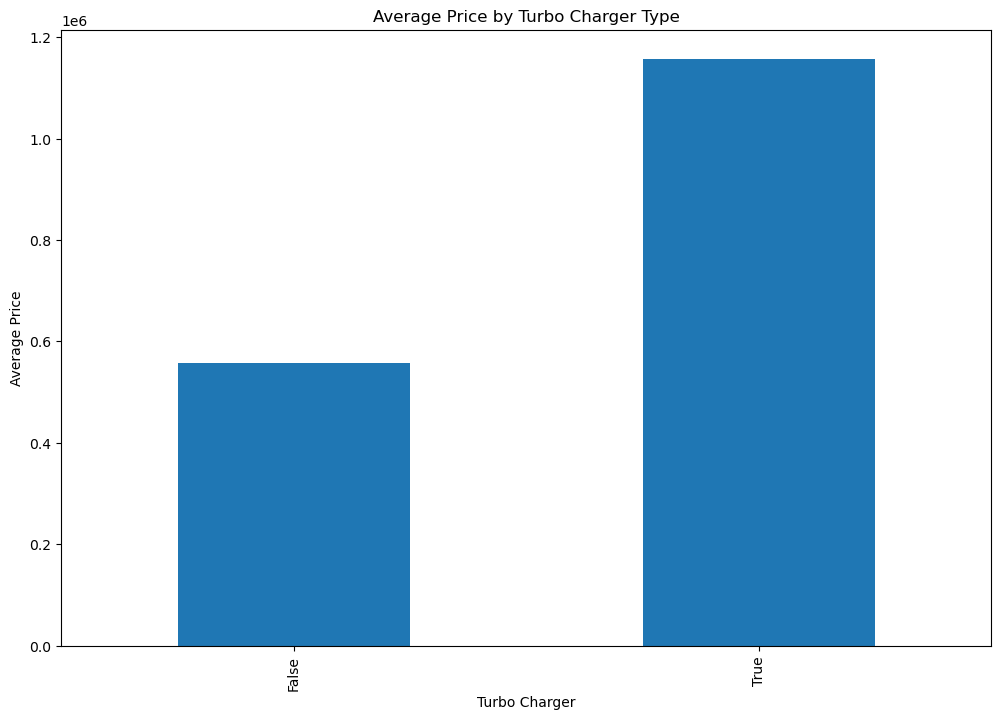

In [220]:
#plotting
plt.figure(figsize=(12, 8))
average_prices = df_outliers_removed.groupby('Turbo Charger')['price'].mean().sort_values()
average_prices.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average Price by Turbo Charger Type')
plt.xlabel('Turbo Charger')
plt.ylabel('Average Price')
plt.show()

### Gear Box

In [221]:
print(df_outliers_removed['Gear Box'].value_counts())
print(df_outliers_removed['Gear Box'].isna().sum())

Gear Box
5 Speed                             4154
6 Speed                              941
5-Speed                              509
6-Speed                              217
7 Speed                              202
                                    ... 
6Speed                                 1
8-Speed Automatic Transmission         1
6-speed iMT                            1
Six Speed Automatic Transmission       1
10 speed                               1
Name: count, Length: 72, dtype: int64
50


In [222]:
# this parameter is not very necessary as we already have Transmission and fuel type columns
# also this column has 92 classes which is too many 
df_outliers_removed.drop('Gear Box',axis=1,inplace=True)

### Drive Type

In [223]:
print(df_outliers_removed['Drive Type'].value_counts())
print(df_outliers_removed['Drive Type'].isna().sum())

Drive Type
FWD                                  5183
RWD                                   301
2WD                                   117
AWD                                   109
4X2                                    67
2 WD                                   45
4X4                                    41
4WD                                    41
Front Wheel Drive                      38
FWD                                    34
4x2                                    15
Two Wheel Drive                        14
4x4                                    11
Rear Wheel Drive with ESP               6
All Wheel Drive                         2
Permanent all-wheel drive quattro       2
2WD                                     1
4 WD                                    1
Name: count, dtype: int64
1367


In [224]:
# Define a function to classify Drive Type into three categories
def classify_drive_type(drive):
    if isinstance(drive, str):  # Check if 'drive' is a string
        drive = drive.lower()  # Convert to lowercase for consistency
        if 'fwd' in drive or 'front' in drive or 'two wheel' in drive or '2wd' in drive:
            return '2WD'
        elif 'awd' in drive or '4wd' in drive or '4x4' in drive or 'rwd' in drive or 'rear' in drive:
            return 'AWD/4WD'
    # Handle missing or unclassified values by returning 'Unknown'
    return 'Unknown'

# Apply the classification function to the 'Drive Type' column
df_outliers_removed['Drive_Type_Classified'] = df_outliers_removed['Drive Type'].apply(classify_drive_type)

# Verify the result
df_outliers_removed['Drive_Type_Classified'].value_counts()


Drive_Type_Classified
2WD        5387
Unknown    1499
AWD/4WD     509
Name: count, dtype: int64

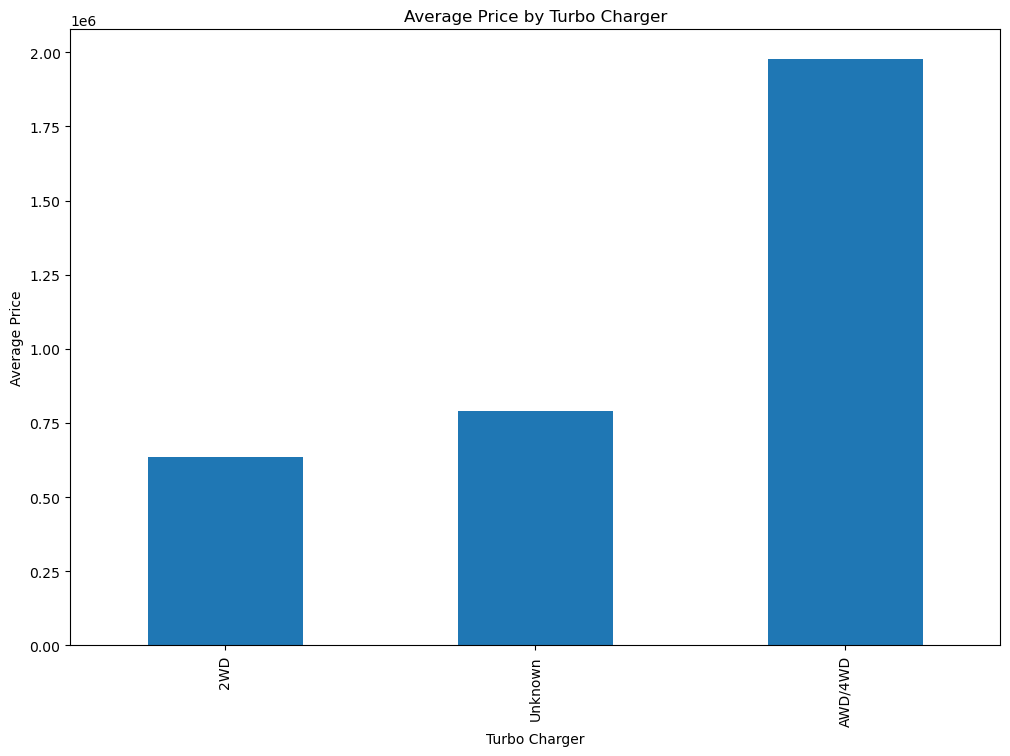

In [225]:
plt.figure(figsize=(12, 8))
average_prices = df_outliers_removed.groupby('Drive_Type_Classified')['price'].mean().sort_values()
average_prices.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average Price by Turbo Charger')
plt.xlabel('Turbo Charger')
plt.ylabel('Average Price')
plt.show()

In [226]:
# drop the old column
df_outliers_removed.drop(['Drive Type'],axis=1,inplace=True)

### Steering Type

In [227]:
print(df_outliers_removed['Steering Type'].value_counts())
print(df_outliers_removed['Steering Type'].isna().sum())

Steering Type
Power         5631
Electric      1320
Electronic     102
Manual          58
Electrical      39
power           29
EPAS             9
Name: count, dtype: int64
207


In [228]:
# Define a function to classify Steering Type into three categories
def classify_steering_type(steering):
    if isinstance(steering, str):  # Ensure it's a string
        steering = steering.lower()  # Convert to lowercase
        if 'power' in steering:
            return 'Power'
        elif 'electric' in steering or 'epas' in steering or 'electronic' in steering:
            return 'Electric'
        elif 'manual' in steering:
            return 'Manual'
    # Handle missing or unclassified values by returning 'Power'
    return 'Power'

# Apply the classification function to the 'Steering Type' column
df_outliers_removed['Steering_Type_Classified'] = df_outliers_removed['Steering Type'].apply(classify_steering_type)

# Verify the result
df_outliers_removed['Steering_Type_Classified'].value_counts()


Steering_Type_Classified
Power       5867
Electric    1470
Manual        58
Name: count, dtype: int64

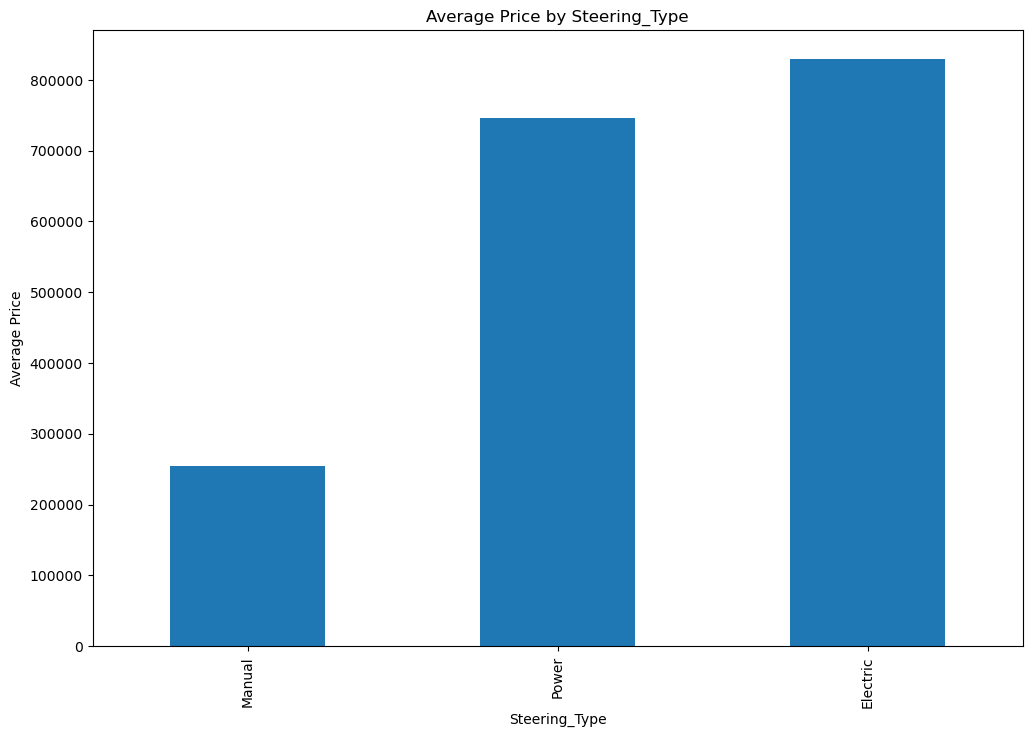

In [229]:
plt.figure(figsize=(12, 8))
average_prices = df_outliers_removed.groupby('Steering_Type_Classified')['price'].mean().sort_values()
average_prices.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average Price by Steering_Type')
plt.xlabel('Steering_Type')
plt.ylabel('Average Price')
plt.show()

In [230]:
# here power and electric show almost similar behaviour with respect to price and rowws with manual are significantly less. 
# so we can drop this column
df_outliers_removed.drop(['Steering_Type_Classified','Steering Type'],axis=1,inplace=True)

### Front Brake Type , Rear Brake Type

In [231]:
print(df_outliers_removed['Front Brake Type'].value_counts())

print('\n',df_outliers_removed['Rear Brake Type'].value_counts())


Front Brake Type
Disc                                        4834
Ventilated Disc                             2176
Disc                                          70
Solid Disc                                    63
Ventilated Discs                              50
Disc & Caliper Type                           40
Disk                                          23
Ventilated Disc                               23
Ventilated Disk                               11
disc                                           7
Ventilated discs                               6
Drum                                           6
 Disc                                          6
Multilateral Disc                              6
Ventlated Disc                                 6
Vantilated Disc                                5
Ventilated DIsc                                5
Ventillated Disc                               3
 Ventilated Disc                               2
Vacuum assisted hydraulic dual circuit w       2
Ven

In [232]:
# The Steering Type feature has too many categories and doesn’t really affect car prices, so we should remove it.
# There are very few instances of Drum (5) and ABS (2) compared to Disc, which constitutes over 90% of the data, making them unlikely to benefit our model.

df_outliers_removed.drop(['Front Brake Type','Rear Brake Type'],axis=1,inplace=True)

### Tyre Type

In [233]:
df_outliers_removed['Tyre Type'].value_counts()

Tyre Type
Tubeless,Radial           3811
Tubeless, Radial          1318
Tubeless                  1117
Tubeless Tyres             391
Radial, Tubeless           216
Radial                     117
Radial, Tubless             82
Tubeless Tyres, Radial      54
Tubeless Radial Tyres       50
Tubeless,Radial             50
Radial,Tubeless             31
Tubeless,Radials            27
Tubless, Radial             24
tubeless tyre               14
Runflat                     12
Run-Flat                    12
Tubeless, Runflat            7
Tubeless                     7
Radial Tubeless              4
Tubeless Radials Tyre        3
Tubeless,Runflat             3
Tubeless Tyre                2
Runflat Tyres                2
Radial Tyres                 1
Tubeless, Radials            1
Name: count, dtype: int64

In [234]:
# most of the rows seem to have the same tyres Tubeless or Radical. Since the whole column have the same data we can drop it 
df_outliers_removed.drop(['Tyre Type'],axis=1,inplace=True)

### Location

In [235]:
df_outliers_removed['Location'].value_counts()	

Location
hyderabad    1338
Bangalore    1307
Chennai      1276
Delhi        1241
Kolkata      1240
Jaipur        993
Name: count, dtype: int64

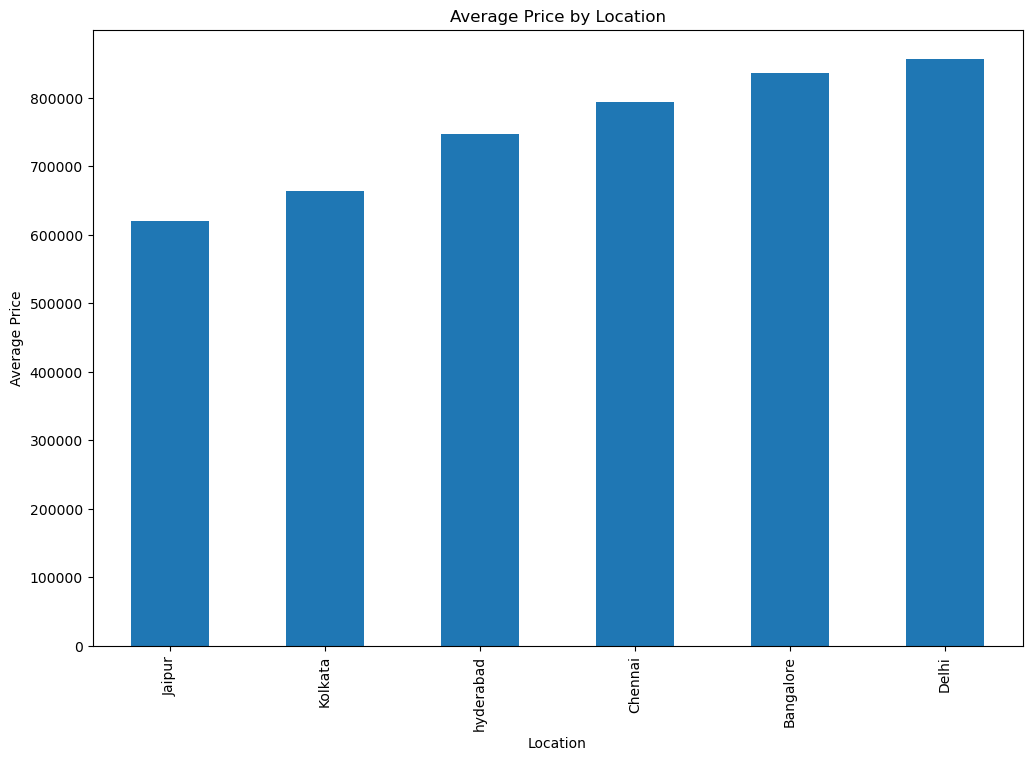

In [236]:
# this is the column which we have added based on the excel files 
# lets see the relationship with mean price
plt.figure(figsize=(12, 8))
average_prices = df_outliers_removed.groupby('Location')['price'].mean().sort_values()
average_prices.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.show()

In [237]:
# there is change with respect to location , so we use it 

In [238]:
df_outliers_removed.isna().sum()

ft                       0
bt                       0
km                       0
transmission             0
ownerNo                  0
company                  0
model                    0
modelYear                0
price                    0
Insurance Validity       0
Mileage                  0
Color                    0
Displacement             0
Turbo Charger            0
Location                 0
RTO_region               0
Drive_Type_Classified    0
dtype: int64

In [239]:
df_outliers_removed.to_excel('Preprocessed_data.xlsx',index=False

In [242]:
df_outliers_removed.head(1)

,ft,bt,km,transmission,ownerNo,company,model,modelYear,price,Insurance Validity,Mileage,Color,Displacement,Turbo Charger,Location,RTO_region,Drive_Type_Classified
0,Petrol,Hatchback,20000.0,Automatic,1,Volkswagen,Volkswagen Polo,2022,1044000.0,Third Party insurance,16.47,Other,999.0,True,hyderabad,Unknown,2WD


# 3. Preparing Models

## Linear Regression , Decision Trees, Random Forest , XG Boost 
### Trying these models for our dataset

In [243]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Load the dataset
df_cars = pd.read_excel('Preprocessed_data.xlsx')

# Identify categorical and numerical columns
cat_features = df_cars.select_dtypes(include=['object']).columns
num_features = df_cars.select_dtypes(include=['number']).columns

# Separate features (X) and target (y)
X = df_cars.drop('price', axis=1)
y = df_cars['price']

# Encode categorical features
X_encoded = pd.get_dummies(X, columns=cat_features, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, shuffle=True)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Define models
regressors = {
    'Random Forest': RandomForestRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression()
}

# Store model performance results
performance_results = {}

# Loop through each model
for model_name, model in regressors.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Compute performance metrics for training and testing sets
    metrics = {
        'Train MSE': mean_squared_error(y_train, train_preds),
        'Train MAE': mean_absolute_error(y_train, train_preds),
        'Train R2': r2_score(y_train, train_preds),
        'Train MAPE': mean_absolute_percentage_error(y_train, train_preds) * 100,
        'Test MSE': mean_squared_error(y_test, test_preds),
        'Test MAE': mean_absolute_error(y_test, test_preds),
        'Test R2': r2_score(y_test, test_preds),
        'Test MAPE': mean_absolute_percentage_error(y_test, test_preds) * 100
    }
    
    performance_results[model_name] = metrics

# Convert results to DataFrame
results_df = pd.DataFrame(performance_results).T

# Display results
print(results_df)


Training data shape: (5916, 204)
Testing data shape: (1479, 204)
                            Train MSE      Train MAE  Train R2  Train MAPE  \
Random Forest            3.829478e+09   32994.828987  0.990559    5.050028   
XGBoost Regressor        5.147022e+09   48864.439211  0.987311    8.409458   
Decision Tree Regressor  1.646138e+08     650.101420  0.999594    0.059475   
Linear Regression        5.643059e+10  132322.425405  0.860877   24.712700   

                             Test MSE       Test MAE   Test R2  Test MAPE  
Random Forest            2.759066e+10   86998.934298  0.937580  13.030234  
XGBoost Regressor        2.391558e+10   82597.844905  0.945895  12.754370  
Decision Tree Regressor  4.245338e+10  113295.711291  0.903956  16.990215  
Linear Regression        6.386995e+10  141635.483921  0.855504  24.790534  


In [245]:
# Random Forest and XGBoost were the best working models on test data based on MSE, MAE and R2 scores
#The XGBoost Regressor has a lower Test MSE, MAE, and MAPE, and a higher R² score compared to the Random Forest model, making it the best-performing model in this evaluation.
# The Random Forest model is the second-best based on its relatively good performance metrics.


In [247]:
# Random Forest : Tuning using random search cv and testing again
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Hyperparameter tuning using RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the RandomizedSearchCV
rf_random_search.fit(X_train, y_train)

# Get the best parameters
best_rf_params = rf_random_search.best_params_
print(f"Best Random Forest Parameters: {best_rf_params}")

# Initialize and train the Random Forest model with best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    max_features=best_rf_params['max_features'],
    bootstrap=best_rf_params['bootstrap'],
    random_state=42
)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on training data
y_train_pred = best_rf_model.predict(X_train)

# Calculate metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100

# Print metrics for the training set
print(f"Training Metrics:")
print(f"MSE: {train_mse}")
print(f"MAE: {train_mae}")
print(f"R^2: {train_r2}")
print(f"MAPE: {train_mape}%")

# Make predictions on test data
y_test_pred = best_rf_model.predict(X_test)

# Calculate metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100

# Print metrics for the test set
print(f"\nTest Metrics:")
print(f"MSE: {test_mse}")
print(f"MAE: {test_mae}")
print(f"R^2: {test_r2}")
print(f"MAPE: {test_mape}%")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\saina\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
260 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\saina\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saina\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\saina\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\saina\anaconda3\Lib\site-package

Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Training Metrics:
MSE: 14671442668.14681
MAE: 66425.20442959013
R^2: 0.963829250288357
MAPE: 11.088976447036162%

Test Metrics:
MSE: 39614826587.19786
MAE: 103920.71985398664
R^2: 0.9103773305189297
MAPE: 17.535655577897263%


In [253]:
# XGBoost : Tuning using random search cv and testing again

xgb_model = XGBRegressor(random_state=42)

# Define hyperparameter grid for RandomizedSearchCV
param_distributions_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, 15, 20],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions_xgb,
    n_iter=50,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model
xgb_random_search.fit(X_train, y_train)

# Get the best parameters
best_xgb_params = xgb_random_search.best_params_
print(f"Best XGBoost Parameters: {best_xgb_params}")

# Initialize and train the XGBoost model with the best parameters
best_xgb_model = XGBRegressor(
    n_estimators=best_xgb_params['n_estimators'],
    max_depth=best_xgb_params['max_depth'],
    learning_rate=best_xgb_params['learning_rate'],
    subsample=best_xgb_params['subsample'],
    colsample_bytree=best_xgb_params['colsample_bytree'],
    random_state=42
)

best_xgb_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_xgb = best_xgb_model.predict(X_train)

# Calculate metrics for the training set
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
mape_train_xgb = mean_absolute_percentage_error(y_train, y_train_pred_xgb) * 100

# Print metrics for the training set
print(f"XGBoost Training Metrics:")
print(f"MSE: {mse_train_xgb}")
print(f"MAE: {mae_train_xgb}")
print(f"R^2: {r2_train_xgb}")
print(f"MAPE: {mape_train_xgb}%")

# Make predictions on the test set
y_test_pred_xgb = best_xgb_model.predict(X_test)

# Calculate metrics for the test set
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
mape_test_xgb = mean_absolute_percentage_error(y_test, y_test_pred_xgb) * 100

# Print metrics for the test set
print(f"XGBoost Test Metrics:")
print(f"MSE: {mse_test_xgb}")
print(f"MAE: {mae_test_xgb}")
print(f"R^2: {r2_test_xgb}")
print(f"MAPE: {mape_test_xgb}%")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGBoost Parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
XGBoost Training Metrics:
MSE: 1739281507.2027473
MAE: 29173.579885321586
R^2: 0.9957120020506431
MAPE: 5.553140648089869%
XGBoost Test Metrics:
MSE: 23585375709.142944
MAE: 79763.75197821585
R^2: 0.9466415856418141
MAPE: 11.897716338579054%


In [248]:
# We can see that even after tuning the hyper parameters for xgboost , we are getting almost the same R^2 scores .

### Regularization techniques Lasso, Ridge

In [249]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
}
# Store the results
results = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100
    
    # Store the results
    results[model_name] = {
        'MSE_train': mse_train,
        'MAE_train': mae_train,
        'R2_train': r2_train,
        'MAPE_train': mape_train,
        'MSE_test': mse_test,
        'MAE_test':mae_test,
        'R2_test': r2_test,
        'MAPE_test': mape_test
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                     MSE_train      MAE_train  R2_train  MAPE_train  \
Ridge Regression  5.735454e+10  134379.560801  0.858599   25.159768   
Lasso Regression  5.644449e+10  132405.921317  0.860843   24.734349   

                      MSE_test       MAE_test   R2_test  MAPE_test  
Ridge Regression  6.413396e+10  144193.177624  0.854906  25.167451  
Lasso Regression  6.387443e+10  141719.521042  0.855494  24.795948  


C:\Users\saina\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.672e+14, tolerance: 2.400e+11
  model = cd_fast.enet_coordinate_descent(


## We conclude that XGBoost is the best model with best scores out of everything

## Save the model

In [254]:
import joblib

# Save the model
joblib.dump(best_xgb_model, 'xgboost_ml_model.pkl')


['xgboost_ml_model.pkl']

In [255]:
# Save column names for encoding
encoded_columns = list(X_encoded.columns)
joblib.dump(encoded_columns, 'encoded_columns.pkl')

['encoded_columns.pkl']